## C S 329E HW 11

# Ethan Mikel
- Student UT EID: etm693

# David Paul Salinas 
- Partner UT EID: dps2387

## C S 329E HW 11

# Hierarchical Clustering and Cluster Evaluation

## Your name here (and your partner's name if you are working in a pair)

As we are well into November, let us consider presidential elections of years past and do some exploratory grouping of states based on the 2008,2012, and 2016 presidential elections results.  The data we have is from the [The American Presidency Project](https://www.presidency.ucsb.edu/statistics/elections) and split into two files:

  - `votes_by_state.csv` => has the raw number of ballots cast for each of the top presidential candidates from 2008-2012 by US State (and the District of Columbia)
  - `republican_percentage_by_state.csv` => has the percentage of votes that were for the Republican candidate for 2008, 2012, and 2016 by US State (and the District of Columbia)
  
Our job is to group together states using different hierarchical agglomerative methodologies and compare the results.  You can imagine how finding states that tend to vote similarly to each other might be useful for election predictions, or for identifying swing states as part of a political campaign to invest in.

In [44]:
# Do not modify import block, all necessary imports are included

# Our regular libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# This is for our hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

# For our k-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

## Q1 - Using Different Proximity Functions

There is another scientific python library we haven't used much, SciPy, which has [library for hierarchical clustering](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) and for [plotting dendrograms](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram). 

Use these libraries to plot the hierarchical clusters formed from the raw vote count (`votes_by_state.csv`) using three different proximity measures:
  - Ward
  - Min
  - Max
  
The x-axis of the dendrogram should be labeled using the state name (and not the index of the state in the data frame).  The title should reflect what proximity measure you used to create the clusters.  In this use case only the number of votes cast are attributes, and the State names are the labels on that row of data.

Note, to make the plot legible you will have to change the plot size.  I found `figsize=(12,8)` worked well for me, but your mileage may vary depending on your setup. 

In [45]:
# Load the data, save off the state names into another series and just leave the attributes.
df_X = pd.read_csv('votes_by_state.csv')
s_states = df_X['State']
df_X = df_X.drop(columns=['State'])

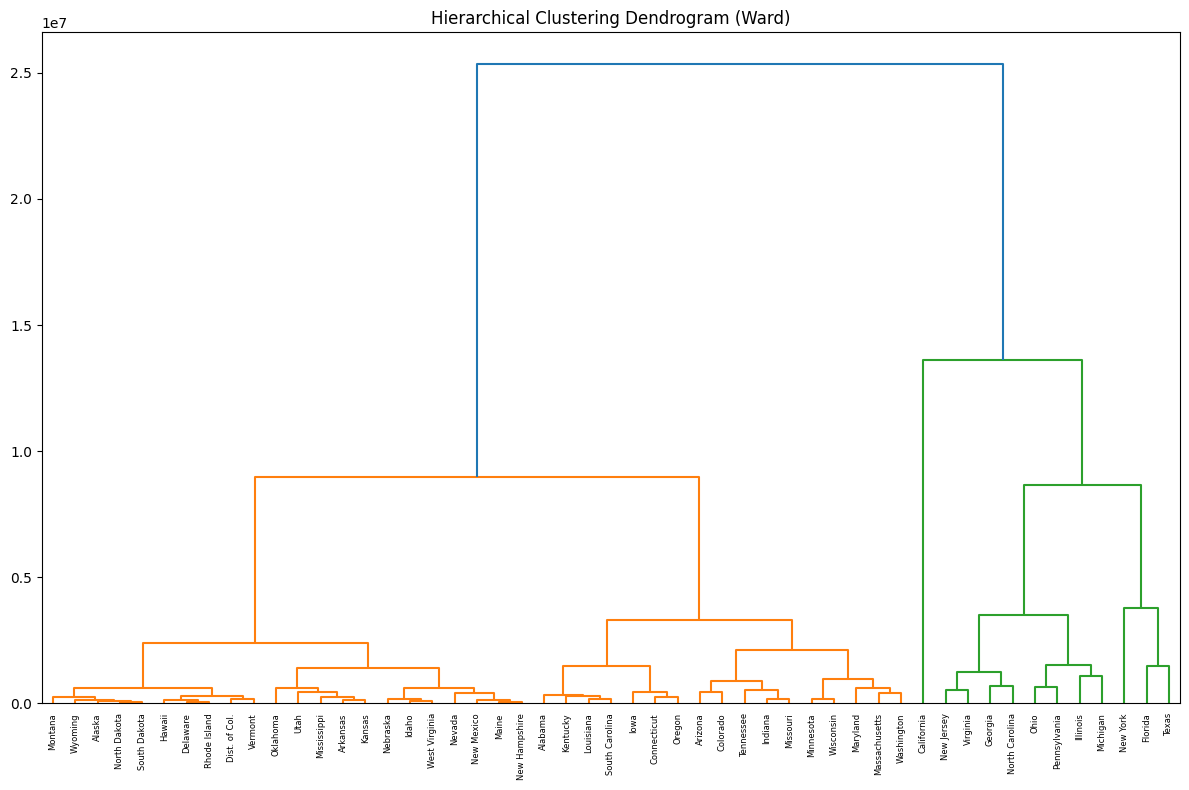

In [46]:
# Plot the dendrogram for the Ward proximity measure
plt.figure(figsize=(12, 8))
Z_ward = linkage(df_X, method='ward')
plt.title('Hierarchical Clustering Dendrogram (Ward)')
dendrogram(Z_ward, labels=s_states.to_numpy(), leaf_rotation=90)
plt.tight_layout()
plt.show()

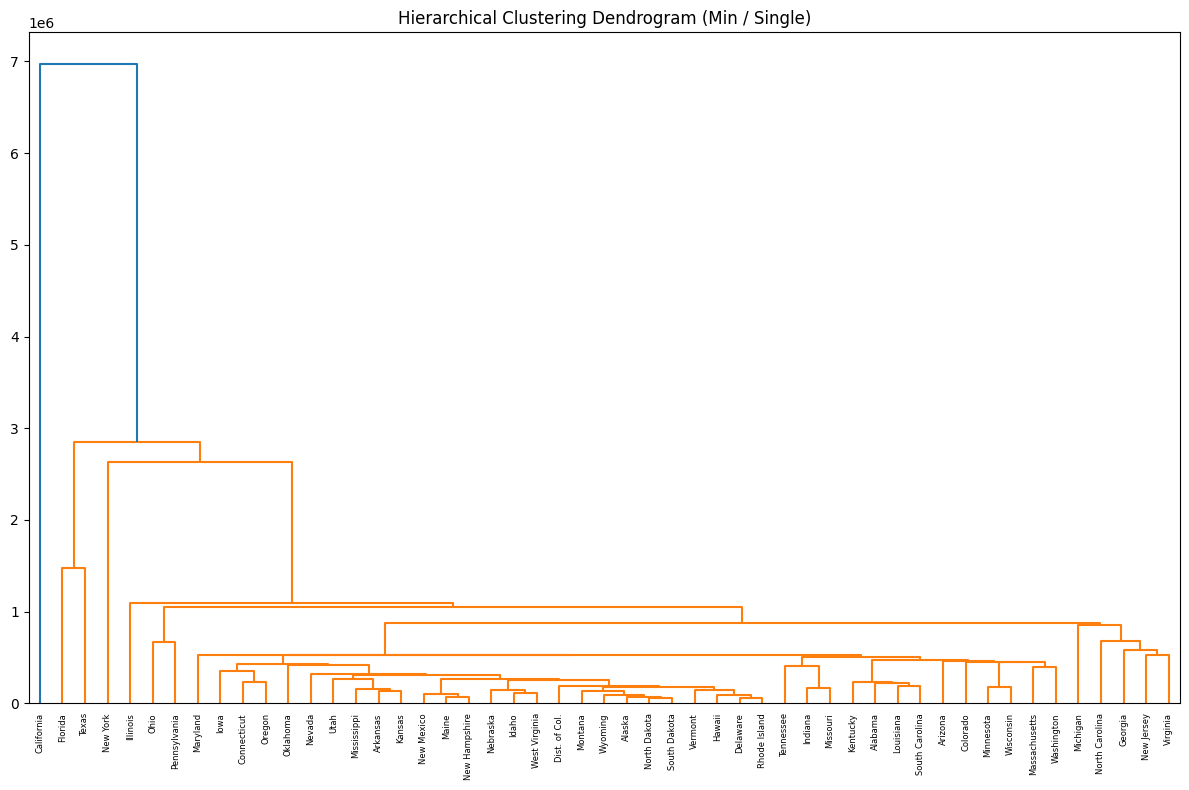

In [47]:
# Plot the dendrogram for the min proximity measure
plt.figure(figsize=(12, 8))
Z_single = linkage(df_X, method='single')
plt.title('Hierarchical Clustering Dendrogram (Min / Single)')
dendrogram(Z_single, labels=s_states.to_numpy(), leaf_rotation=90)
plt.tight_layout()
plt.show()

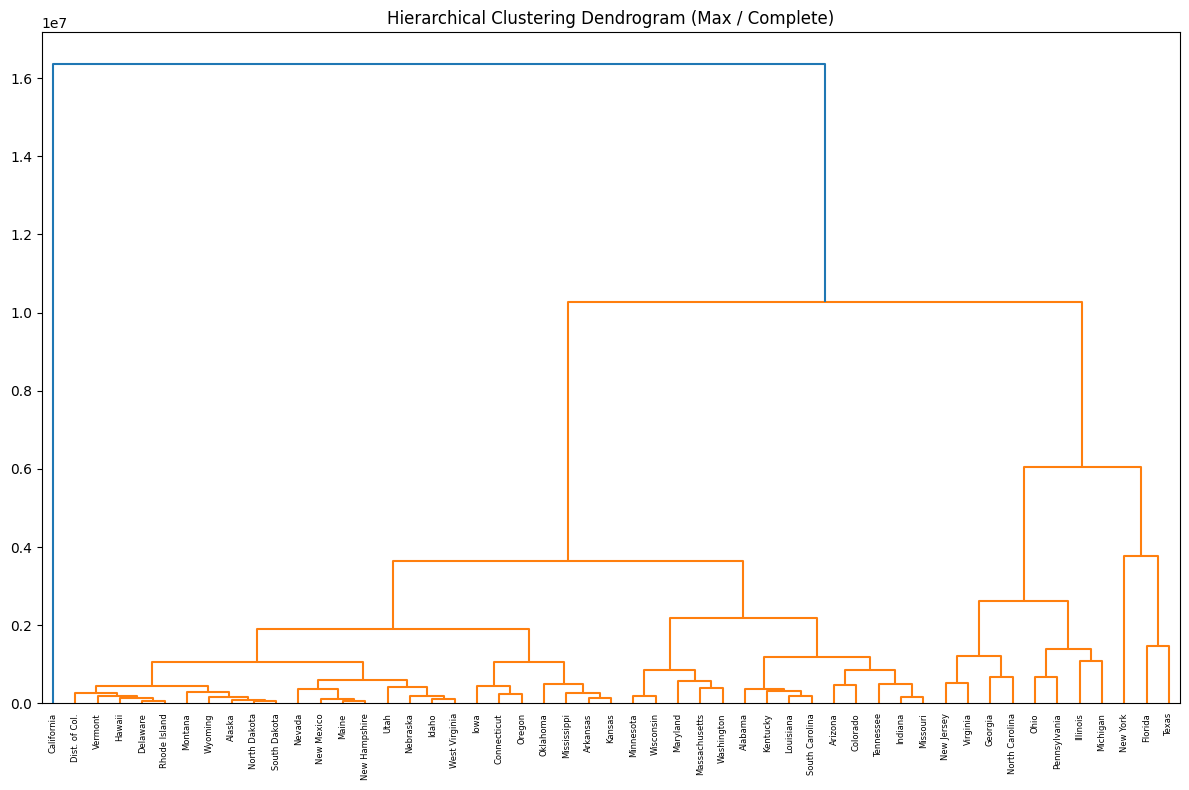

In [48]:
# Plot the dendrogram for the max proximity measure
plt.figure(figsize=(12, 8))
Z_complete = linkage(df_X, method='complete')
plt.title('Hierarchical Clustering Dendrogram (Max / Complete)')
dendrogram(Z_complete, labels=s_states.to_numpy(), leaf_rotation=90)
plt.tight_layout()
plt.show()

## Q2 - Using Different Proximity Functions (part 2)

What is happening?  Even if you aren't a big politics wonk, you might find it strange that New York is closer to Texas than it is to California in all of those graphs!! You may think to yourself, "Self, how could this be?" You also might notice that Montana, Wyoming, and Alaska all tend to cluster together in all of these scenarios. 

At this point, your data science brain might be noticing that the _population_ of that state seems to be more important than which party _won_ the state.  You decide to engineer the data such that you reduce the dimensions down from 7 attributes, to 3 attributes, where each column is the _percentage_ of votes that were cast to the Republican candidate, and a 4th attribute indicating the range of percentages across the 3 elections.  I went ahead and did this for you, and created the file `republican_percentage_by_state.csv`. 

Plot the hierarchical clusters formed from percentage of ballots cast by Republicans (`republican_percentage_by_state.csv`) using three different proximity measures:
  - Ward
  - Min
  - Max
  
The x-axis of the dendrogram should be labeled using the state name (and not the index of the state in the data frame).  The title should reflect what proximity measure you used to create the clusters.  In this use case only the number of votes cast are attributes, and the State names are the labels on that row of data.

Note, to make the plot legible you will have to change the plot size.  I found `figsize=(12,8)` worked well for me, but your mileage may vary depending on your setup. 

In [49]:
# Load the data, save off the state names into another series and just leave the attributes.
df_X = pd.read_csv('republican_percentage_by_state.csv')
s_states = df_X['State']
df_X = df_X.drop(columns=['State'])

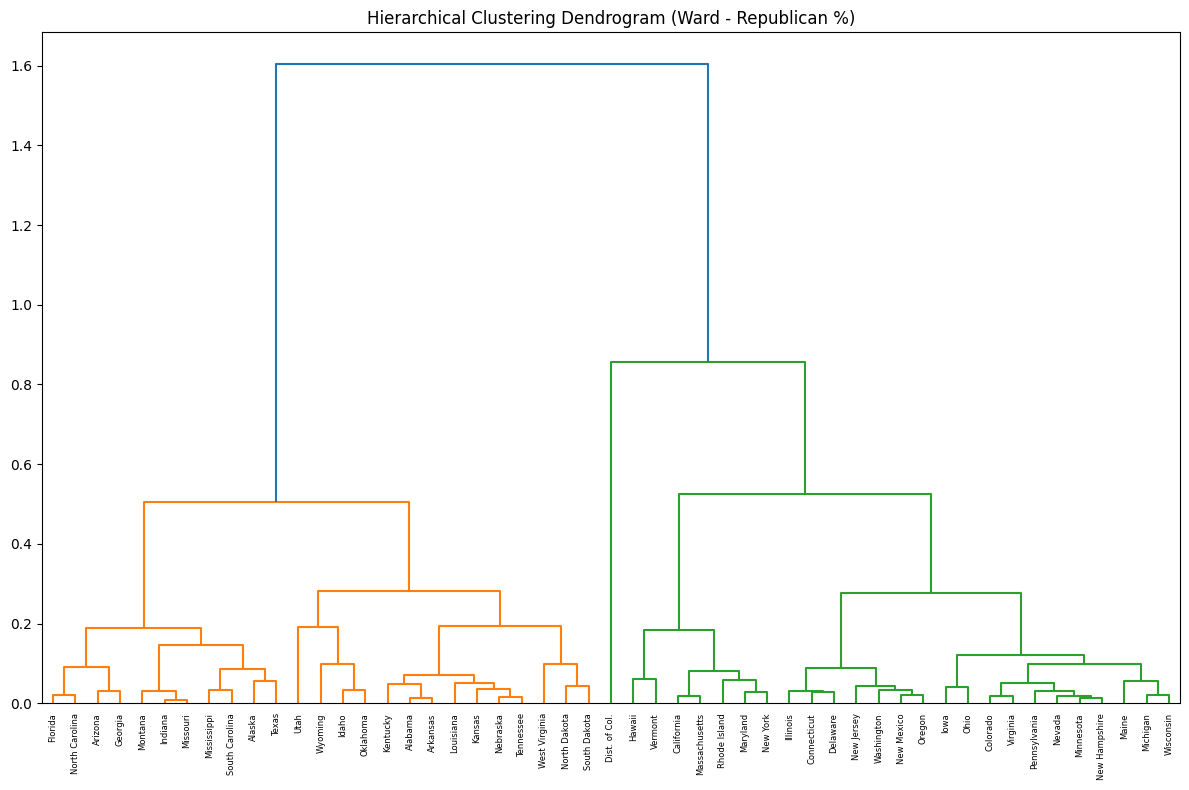

In [50]:
# Plot the dendrogram for the Ward proximity measure
plt.figure(figsize=(12, 8))
Z_ward = linkage(df_X, method='ward')
plt.title('Hierarchical Clustering Dendrogram (Ward - Republican %)')
dendrogram(Z_ward, labels=s_states.to_numpy(), leaf_rotation=90)
plt.tight_layout()
plt.show()

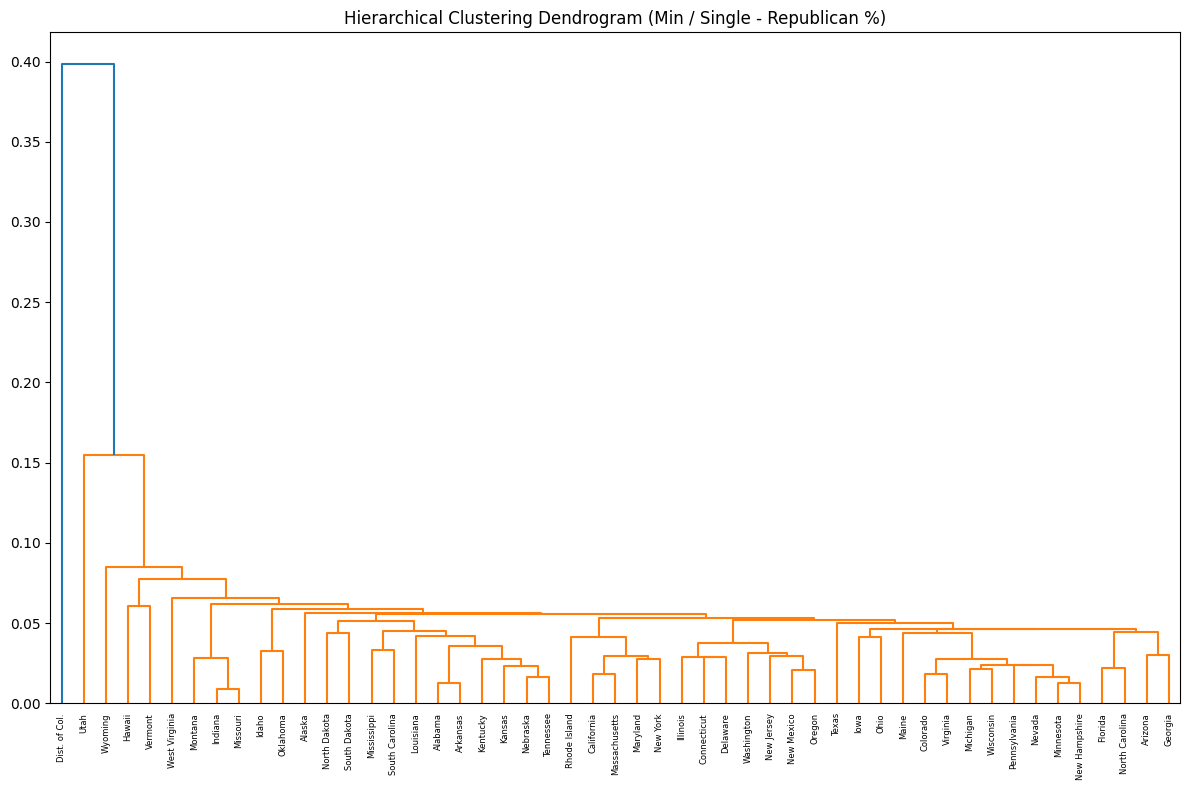

In [51]:
# Plot the dendrogram for the min proximity measure
plt.figure(figsize=(12, 8))
Z_single = linkage(df_X, method='single')
plt.title('Hierarchical Clustering Dendrogram (Min / Single - Republican %)')
dendrogram(Z_single, labels=s_states.to_numpy(), leaf_rotation=90)
plt.tight_layout()
plt.show()

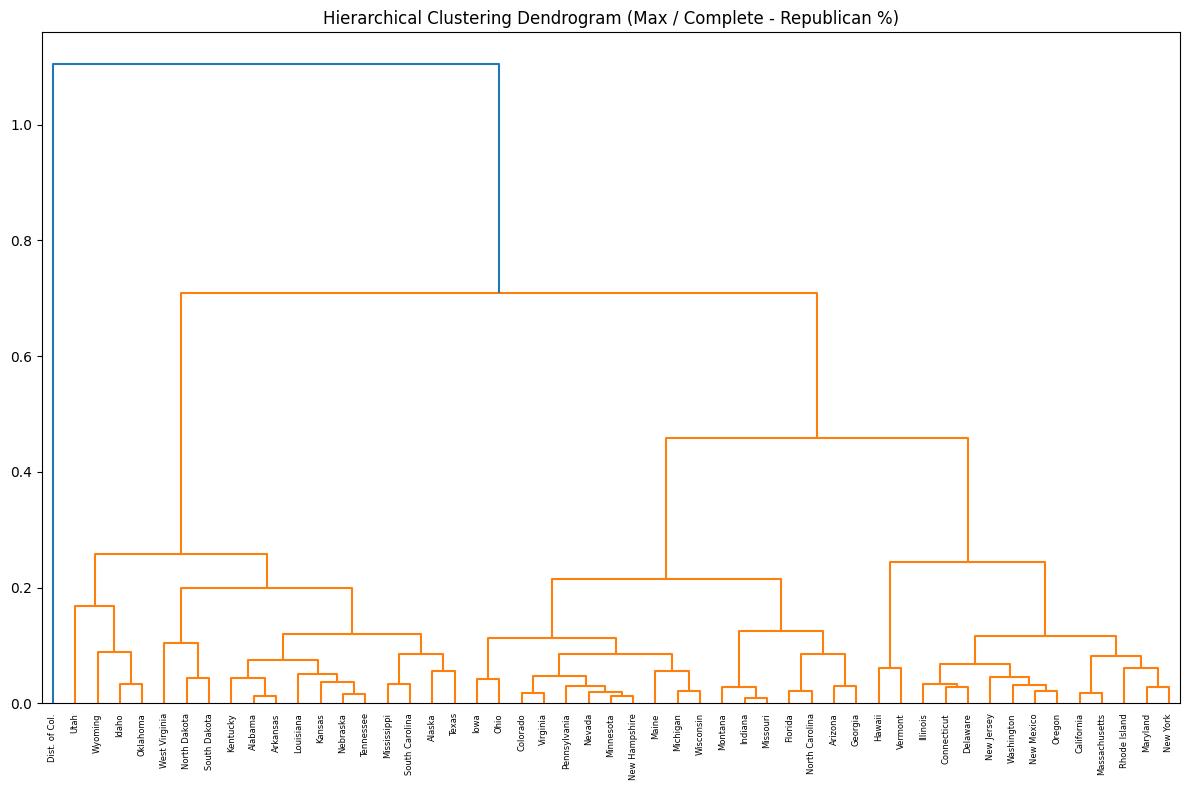

In [52]:
# Plot the dendrogram for the max proximity measure
plt.figure(figsize=(12, 8))
Z_complete = linkage(df_X, method='complete')
plt.title('Hierarchical Clustering Dendrogram (Max / Complete - Republican %)')
dendrogram(Z_complete, labels=s_states.to_numpy(), leaf_rotation=90)
plt.tight_layout()
plt.show()

## Q3 Calculate the Cophenetic Correlation Coefficient (CPCC)

Using the data from question 2 (creating hierarchical clusters on the percentage of Republican votes), calculate the Cophenetic Correlation Coefficient for each of the three methods.  Display the results, and add a markdown cell explaining how to interpret this metric. You may use the scipy [cophenet function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cophenet.html) with the output from  [pdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html) function as the `Y` parameter. 

In [54]:
Y = pdist(df_X)

Z_ward = linkage(df_X, method='ward')
Z_single = linkage(df_X, method='single')
Z_complete = linkage(df_X, method='complete')

cpcc_ward, _ = cophenet(Z_ward, Y)
cpcc_min, _ = cophenet(Z_single, Y)
cpcc_max, _ = cophenet(Z_complete, Y)

In [55]:
# Show the results
(cpcc_ward,cpcc_min,cpcc_max)

(np.float64(0.5883071696030502),
 np.float64(0.695463585768092),
 np.float64(0.7406937703705782))

The Cophenetic Correlation Coefficient (CPCC) measures how well a hierarchical clustering method preserves the original pairwise distances between data points. In our results, the Complete Linkage method had the highest CPCC (0.741), indicating that it best captured the true structure of the Republican vote percentage data. On the other hand, Ward's Method had the lowest CPCC (0.588), suggesting that it did not preserve the original distances as well as the other methods. This may indicate that Ward's method, which minimizes within-cluster variance, did not align with the data's true structure as effectively as Complete Linkage or Single Linkage.

## Q4 Find new Clusters Based on K-Means

A political wonk has come to visit you in your data science dungeon, and looks over your shoulder.  They like what they see, and especially like the patterns from the Ward proximity diagram, and their team is going to come up with 4 different strategies based on the clustering that you have done.  But, your hierarchical clustering didn't come up with a natural 4 clusters! No problem, you decide to use k-means to come up with the 4 clusters.  You choose these points to initialize your cluster centers based on the Ward proximity graph in your hierarchical clusters:

  - Montana
  - Arkansas
  - Massachusetts
  - Minnesota

Pass `random_state = 23` into the [KMeans function](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Print out your centroids before you pass them to K-Means. Print out the States that are in each k-means cluster.

In [56]:
# Find the centroids
initial_states = ['Montana', 'Arkansas', 'Massachusetts', 'Minnesota']
centroids = df_X[s_states.isin(initial_states)].values

In [57]:
# Show the centroids
centroids

array([[0.62534252, 0.62154405, 0.60171721, 0.02362531],
       [0.33835509, 0.38214319, 0.36802922, 0.04378811],
       [0.47186924, 0.46058773, 0.44770625, 0.02416299],
       [0.5757692 , 0.57034232, 0.51169403, 0.06407517]])

In [58]:
# Compute the k-means clusters and show the listing of the States in each cluster
kmeans = KMeans(n_clusters=4, init=centroids, n_init=1, random_state=23)
kmeans.fit(df_X)

cluster_labels = kmeans.labels_

cluster_df = pd.DataFrame({'State': s_states, 'Cluster': cluster_labels})

for i in range(4):
    print(f"\nCluster {i}:")
    print(cluster_df[cluster_df['Cluster'] == i]['State'].values)


Cluster 0:
['Alabama' 'Arkansas' 'Idaho' 'Kentucky' 'Nebraska' 'North Dakota'
 'Oklahoma' 'Tennessee' 'Utah' 'West Virginia' 'Wyoming']

Cluster 1:
['California' 'Dist. of Col.' 'Hawaii' 'Maryland' 'Massachusetts'
 'New York' 'Rhode Island' 'Vermont']

Cluster 2:
['Colorado' 'Connecticut' 'Delaware' 'Florida' 'Illinois' 'Iowa' 'Maine'
 'Michigan' 'Minnesota' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico'
 'Ohio' 'Oregon' 'Pennsylvania' 'Virginia' 'Washington' 'Wisconsin']

Cluster 3:
['Alaska' 'Arizona' 'Georgia' 'Indiana' 'Kansas' 'Louisiana' 'Mississippi'
 'Missouri' 'Montana' 'North Carolina' 'South Carolina' 'South Dakota'
 'Texas']


## Q5 Visualize the Silhouette Coefficients for Each Cluster

Using the [Silhouette Coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html) implementation in sci-kit learn, calculate the silhouette coefficient for each of the States in our data frame using the clustering from Q4, and create a bar graph, similar to the [left plot in this link](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

Use the Silhouette Coefficient plot to identify clusters that have outliers.  Describe in a markdown cells how the visualization helped you identify the outlier points.  

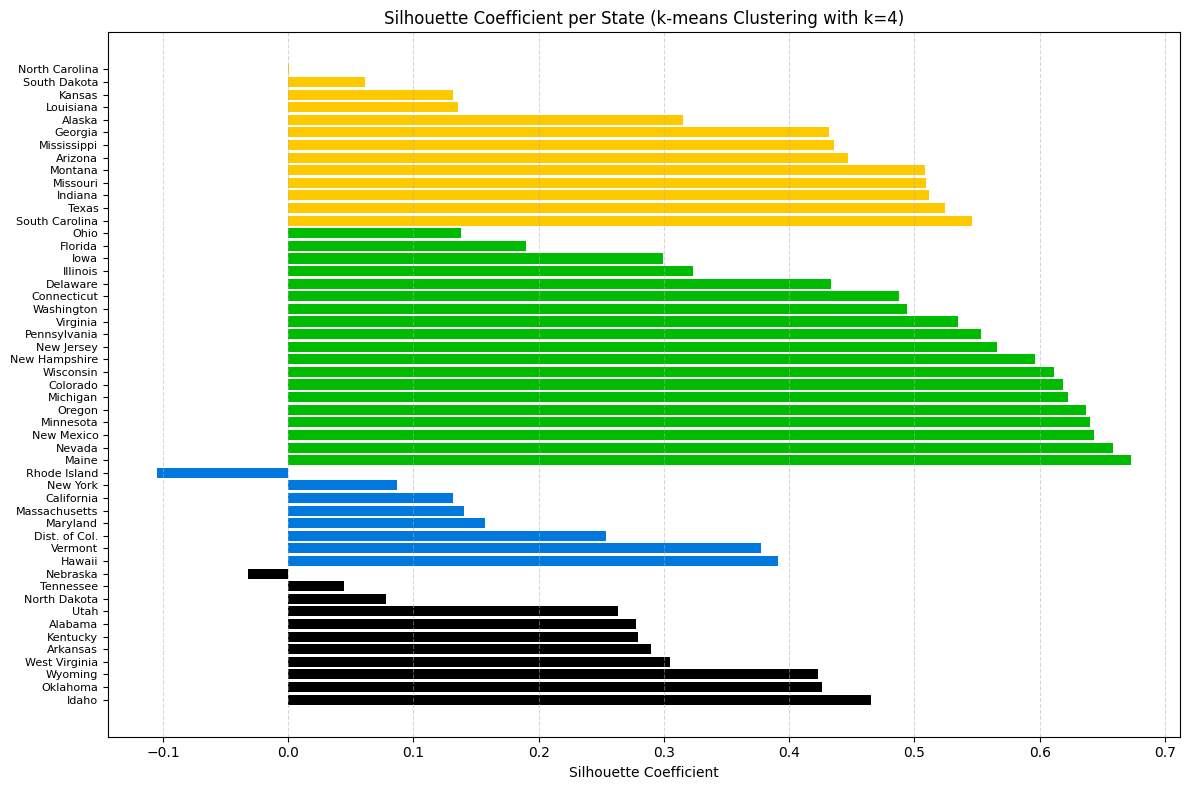

In [59]:
silhouette_vals = silhouette_samples(df_X, cluster_labels)

cluster_df['Silhouette Score'] = silhouette_vals

cluster_df_sorted = cluster_df.sort_values(by=['Cluster', 'Silhouette Score'], ascending=[True, False])
scores_sorted = cluster_df_sorted['Silhouette Score'].values
states_sorted = cluster_df_sorted['State'].values
clusters_sorted = cluster_df_sorted['Cluster'].values

colors = cm.nipy_spectral(clusters_sorted.astype(float) / 4)

plt.figure(figsize=(12, 8))
bar = plt.barh(range(len(scores_sorted)), scores_sorted, color=colors)
plt.yticks(range(len(scores_sorted)), states_sorted, fontsize=8)
plt.xlabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient per State (k-means Clustering with k=4)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The Silhouette Coefficient graph provides a clear visualization of how well each U.S. state fits into its assigned cluster based on the k-means clustering (k=4). Each bar represents a state's silhouette score, where higher values indicate a better fit within its cluster, and lower or negative values suggest poor clustering or potential outliers. By visually inspecting the graph, we can identify states with significantly lower or negative silhouette scores, such as Rhode Island, which stands out as a potential misclassification. Similarly, North Carolina, South Dakota, Kansas, Nebraska, and Tennessee all have notably low silhouette scores compared to their cluster peers, signaling that they may be outliers or edge cases in their respective clusters. The graph makes it easy to spot these misclassifications and outliers, helping us refine our clustering model and better understand regional political patterns based on the input data.